# PyTorch Computer Vision 

## 0. Computer vision libraries on PyTorch 
* `torchvision`: base domain library for PyTorch computer vision 
* `torchvision.datasets`: get datasets and data loading functons 
* `torchvision.models `: get pretrained computer vision models 
* `torchvision.transforms`: functions for manipulating your vision data (images) to be suitable for a ML model
* `torch.utils.data.Dataset`: base dataset class for PyTorch
* `torch.utils.data.Dataloader`: creates a Python iterable over dataset

In [1]:
# Torch
import torch 
from torch import nn

# Torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Extra 
import matplotlib.pyplot as plt     
import numpy as np

# Check GPU and torch version
print(torch.__version__)
print(torchvision.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

/home/jvier/PyTorch-Course/pytorch.env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.1+cu117
0.14.1+cu117
Using device: cpu


/home/jvier/PyTorch-Course/pytorch.env/lib/python3.8/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


## 1. Getting a dataset 

We will be using MNIST dataset (Modified Nationat Institute of Standars and Technology)

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root=".data", # Where to download the data to
    train=True, # Do we want the training dataset
    download=True, # Do we want to download it?
    transform=torchvision.transforms.ToTensor(), # How do we transform the data
    target_transform=None # How do we transform the labels 
)

test_data = datasets.FashionMNIST(
    train=False,
    root=".data",
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See first training samples
image, label = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names, len(class_names), train_data.class_to_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10,
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [7]:
print(f"Image shape: {image.shape} (C, H, W)\nLabel: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) (C, H, W)
Label: Ankle boot


### 1.2 Visualize data

Image shape: torch.Size([1, 28, 28])


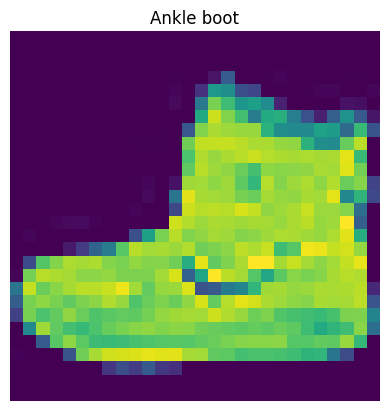

In [8]:
print(f"Image shape: {image.shape}")
#image
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)
plt.show()

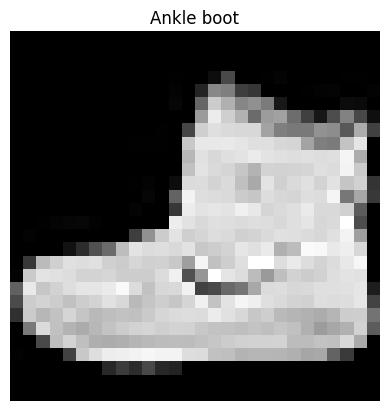

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

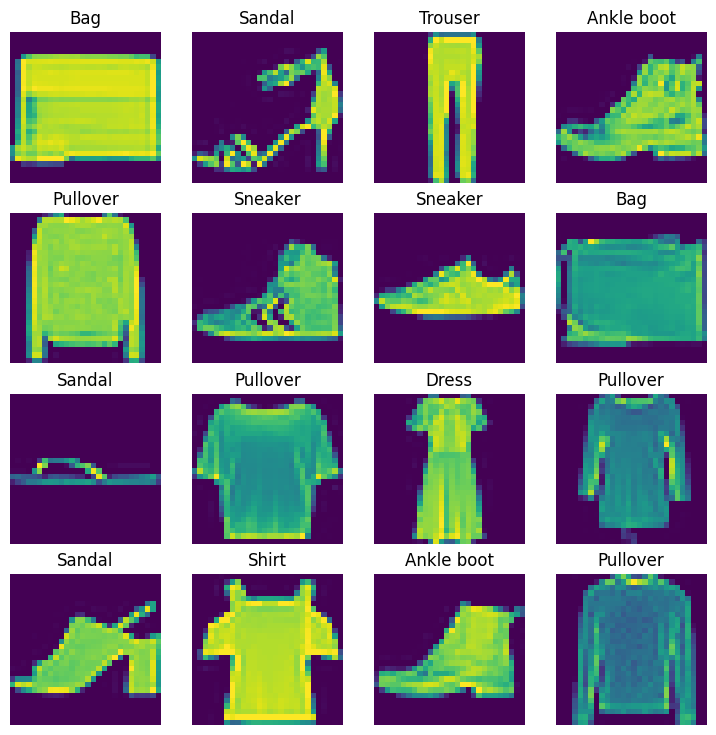

In [10]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False)
    

Do you think this images could be model with pure linear lines? Or we'll need non-linearity layers? 

## 2. Preparete Dataloader

* Right now, our data is in the form of PyTorch Datasets. 
* Dataloaders turns our dataset into a Python iterable.
* We want to turn our data into batches 

**Why?**

1. More computationally efficient (less memory usage).
2. It gives our nn more chances to update its gradient per epoch (update every, in this case, 32 images. Otherwise we would update it just once)

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: .data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: .data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
from torch.utils.data import DataLoader

# Setup batch size
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True 
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True 
)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x76c986042e20>,
 <torch.utils.data.dataloader.DataLoader at 0x76c986042df0>)

In [13]:
# Let's check out what we created 
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x76c986042e20>, <torch.utils.data.dataloader.DataLoader object at 0x76c986042df0>)
Lenght of train_dataloader: 1875 batches of 32
Lenght of test_dataloader: 313 batches of 32


In [14]:
# Train features batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [15]:
# Show a sample 
#torch.manual_seed(42) 
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

Image shape: torch.Size([1, 28, 28])
Label: 5 --> Sandal


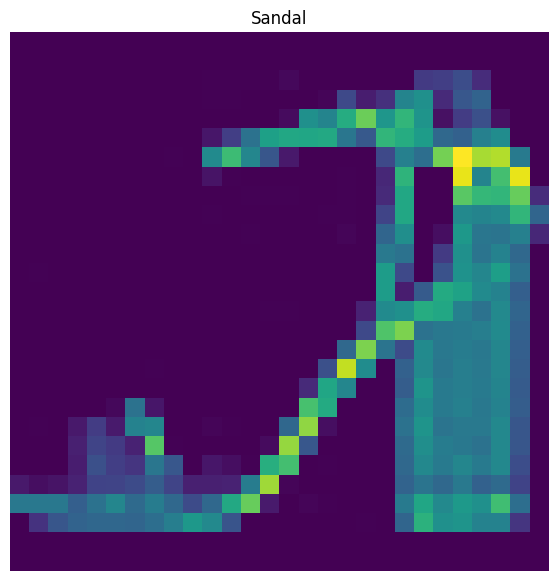

In [16]:
print(f"Image shape: {img.shape}\nLabel: {label} --> {class_names[label]}")
plt.figure(figsize=(10,7))
plt.imshow(img.squeeze())
plt.title(f"{class_names[label]}")
plt.axis(False)
plt.show()

## 3. Model 0: Build a baseline model

Best practice to start with a baseline model.

- **Baseline model**: simple model you will try and improve upon with subsequent models/experiment. Start simply and add complexity when necessary.



In [17]:
# Create a flatten layer 
flatten_model = nn.Flatten()

# Get a sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [18]:
output = flatten_model(x)
print(f"New size = 28 * 28 = {output.shape[1]}")
print(f"We went from [C,H,W] to [C, H*W]")

New size = 28 * 28 = 784
We went from [C,H,W] to [C, H*W]


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
        

In [20]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10, # How many units on the hidden layers
    output_shape=len(class_names) # One for every class
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
with torch.inference_mode():
    model_0.eval()
    dummy_x = torch.rand([1, 1, 28, 28])
    print(model_0(dummy_x),"\n", model_0(dummy_x).shape) 

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]]) 
 torch.Size([1, 10])


### 3.1 Setup optimizer and loss function 

* Since we are in a multi-class model: `nn.CrossEntropyLoss()`.
* Optimizer: `torch.optim.SGD()`.
* Evaluation metric: sine we're working on classificatión, let's use accuracy (`torchmetrics.Accuracy`).

In [22]:
from torchmetrics import Accuracy
optim = torch.optim.SGD(params=model_0.parameters(),
                        lr=.1)
loss_fn = torch.nn.CrossEntropyLoss()
acc_fn = Accuracy(task="multiclass", num_classes=len(class_names))

### 3.2 Creating a function to time our experimets 

ML is very experimental.

Two of the main things you want to track:
1. Model's performance (loss & evaluation metrics)
2. How fast it runs

In [23]:
from timeit import default_timer as timer 
def print_train_time(start:float,
                     end:float,
                     device: str = "cpu"):
    '''
    Prints difference between start and end time.
    '''
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time 

In [24]:
start_time = timer()
# some code ....
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.6621999748167582e-05

### 3.3 Creating training loop 
1. Loop through epochs.
2. Loop through training batches, calculate the train loss *per batch*.
3. Loop through testing batches, calculate the test loss *per batch*.
4. Print what's happening.
5. Time it all (for fun).

In [25]:
# For progress bar 
from tqdm.auto import tqdm

# Set seed and start the timer 
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs 
epochs = 3 

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    
    # * TRAIN
    train_loss = 0
    # Add a loop to loop through the batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        
        # 1. Forward pass 
        y_pred = model_0(X)
        
        # 2. Loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Acumulate training loss
        
        # 3. Zero grad
        optim.zero_grad()
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. Gradient descent 
        optim.step()
        
        # Print out whats happening 
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
        
    # Loss per epoch
    train_loss /= len(train_dataloader)
    
    ### Testing loop 
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        model_0.eval()
        for X_test,y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)
            
            # 2. Calculate loss & accuracy per batch 
            test_loss += loss_fn(test_pred, y_test)
            test_acc += acc_fn(test_pred.argmax(dim=1), y_test)
            
        # Calculate test loss & accuracy per epoch 
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        
    # Print out what's happening 
    print(f"\n Train loss: {train_loss:.4f} | Test loss & acc: [{test_loss:.4f},{test_acc:.4f}]")
    
# Calculate training time 
train_time_end_on_cpu = timer()
train_time_m0 = print_train_time(start=train_time_start_on_cpu,
                                 end=train_time_end_on_cpu,
                                 device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:02<00:05,  2.91s/it]


 Train loss: 0.5904 | Test loss & acc: [0.5102,0.8204]
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:05<00:02,  2.93s/it]


 Train loss: 0.4743 | Test loss & acc: [0.5268,0.8168]
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:09<00:00,  3.01s/it]


 Train loss: 0.4537 | Test loss & acc: [0.5126,0.8300]
Train time on cpu: 9.024 seconds


## 4. Make predictions and get Model 0 results

In [26]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn):
    '''Returns a dictionary contaning the results of the model predicting on data_loader.'''
    loss, acc = torch.Tensor([0]), torch.Tensor([0])
    with torch.inference_mode():
        model_0.eval()
        for X, y in tqdm(data_loader):
            # Make predictions 
            y_pred = model_0(X)
            
            # Acumulate loss and acc per batch 
            loss += loss_fn(y_pred, y)
            acc += acc_fn(y_pred.argmax(dim=1), y)
        
        # Scale loss and acc to fin average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss" :loss.item(),
            "model_acc": acc.item()}
    
# Calculate model 0 result on test dataset
model_0_results = eval_model(model=model_0,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              acc_fn=acc_fn)
model_0_results 

100%|██████████| 313/313 [00:00<00:00, 783.53it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 0.8300718665122986}

## 5. Setup device agnostic-code 

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")
!nvidia-smi

Device: cpu
Tue Aug 26 00:04:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.03              Driver Version: 575.64.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   46C    P0             12W /   70W |      11MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------

## 6. Model 1: Building a better model with non-linearity 

In [28]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int) -> None:
        super().__init__()  
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten inputs into a single vector 
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
            )
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [29]:
next(model_0.parameters()).device

device(type='cpu')

In [30]:
model_1 = FashionMNISTModelV1(input_shape=28*28, # Output of flatten layer, number of pixels
                              output_shape=len(class_names),
                              hidden_units=10).to(device)
model_1, next(model_1.parameters()).device

(FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cpu'))

### 6.1 Loss & optimizer

In [31]:
# Loss & optimizer 
optim = torch.optim.SGD(params=model_1.parameters(),
                        lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()
acc_fn = Accuracy(task="multiclass", 
                  num_classes=len(class_names))

### 6.2 Functionizing training and evaluation/testing loop

* training loop -> `train_step`
* test loop -> `test_step`

In [50]:
# Train step 
def train_step(model: torch.nn.Module, 
               data_loader: DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device:str = device):
    
    '''
    Performs a training with model trying to learn on data_loader
    Args: 
        model: torch.nn.Module
        data_loader: DataLoade
        loss_fn: torch.nn.Module
        optimizer: torch.optim.Optimizer
        device:str 
    '''
    
    train_loss, train_acc = torch.tensor([0], dtype=torch.float32), torch.tensor([0], dtype=torch.float32)
    
    # Put model into training mode
    model.train()
    
    for batch, (X, y) in enumerate(data_loader):    
        # Put data into target device
        X, y = X.to(device), y.to(device)
                
        # 1. Forward pass 
        y_pred = model(X) # Ouput raw logits from the model
        
        # 2. Loss & acc (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Acumulate training loss
        train_acc += acc_fn(y_pred.argmax(dim=1), y)
        
        # 3. Zero grad
        optimizer.zero_grad()
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. Gradient descent 
        optimizer.step()
        
    # Loss & accuracy per epoch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss & accuracy: [{float(train_loss.item()):.5f},{float(train_acc.item()):.2f}]\n")

In [51]:
def test_step(model: torch.nn.Module, 
              data_loader: DataLoader,
              loss_fn: torch.nn.Module,
              acc_fn,
              device:str = device):
    
    '''
    Performs a testing with model trying to learn on data_loader
    Args: 
        model: torch.nn.Module
        data_loader: DataLoade
        loss_fn: torch.nn.Module
        device:str 
    '''
    
    test_loss, test_acc = torch.tensor([0], dtype=torch.float32), torch.tensor([0], dtype=torch.float32)
    
    # Putting model into inference context 
    with torch.inference_mode():
        model.eval()
        
        # Looping through the batch
        for X, y in data_loader:
            # Send data into target device 
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass 
            test_pred = model(X) 
            
            # 2. Loss & acc
            test_loss += loss_fn(test_pred, y)
            test_acc += acc_fn(test_pred.argmax(dim=1), y)
            
        # Adjust metrics and print out 
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss & acc: [{float(test_loss.item()):.5f},{float(test_acc.item()):.2f}]\n")
        

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer 
time_start_gpu = timer()

epochs = 3

# Looping 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    
    train_step(model=model_1,
               loss_fn=loss_fn,
               optimizer=optim,
               device=device,
               acc_fn=acc_fn,
               data_loader=train_dataloader)
    
    test_step(model=model_1,
              loss_fn=loss_fn,
              device=device,
              acc_fn=acc_fn,
              data_loader=test_dataloader)
    
time_end_gpu = timer()
time = print_train_time(start=time_start_gpu,
                 end=time_end_gpu,
                 device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
